In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('../Assets/Datasets/Outputs/mdw_ModelReady.csv')
df.drop(['Unnamed: 0', 'origin_airport_code'], axis=1, inplace=True)

In [6]:
# Create train & test split
x = df.drop(['dep_delay_c'], axis=1)
y = df['dep_delay_c']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.7)


In [7]:
# Random Forest Classifier
clf = RandomForestClassifier(n_estimators = 100, min_samples_leaf=50,  n_jobs=-1)
clf.fit(x_train, y_train)
print 'Train Score: {}'.format(clf.score(x_train, y_train))
print 'Test Score: {}'.format(clf.score(x_test, y_test))

Train Score: 0.718951572244
Test Score: 0.707262992036


In [8]:
# Random Forest Feature importances
f_imp = pd.DataFrame(zip(x_train.columns, clf.feature_importances_), columns=['Feature', 'Importance'])
f_imp.head(15).sort_values(['Importance'], ascending = False)

,Feature,Importance
3,crs_dep_time_hours,0.321083
1,delta_time_min,0.177949
2,crs_dep_week,0.093741
4,orig_temp,0.063536
0,daily_departures,0.054664
14,airline_Southwest Airlines Co.,0.053284
8,seats,0.038780
6,orig_wind_speed,0.027789
5,orig_visibility,0.016540
9,airline_Delta Air Lines Inc.,0.011608


In [26]:
# Confusion Matrix 
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions)
cm = pd.DataFrame(cm, columns=['predict_no_delay', 'predict_delay'], index=['no_delay', 'delay'])
cm

,predict_no_delay,predict_delay
no_delay,36301,24857
delay,16202,62899


In [30]:
36301+24857+16202+62899

140259

In [28]:
print classification_report(y_test, predictions)

             precision    recall  f1-score   support

          0       0.69      0.59      0.64     61158
          1       0.72      0.80      0.75     79101

avg / total       0.71      0.71      0.70    140259



ROC AUC: 0.77


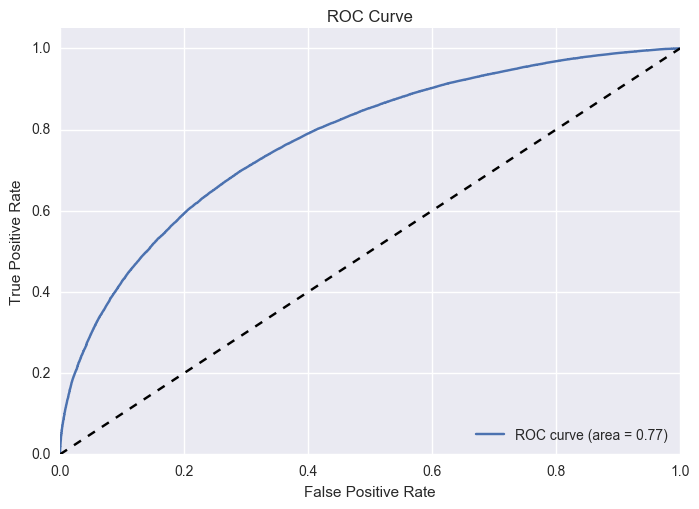

In [13]:
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print 'ROC AUC: %0.2f' % roc_auc
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [19]:
## returns confusion matrix and classification report based on different probability level

def tune_predictions(model, x_test, y_test, probability):
    predict = model.predict_proba(x_test)
    new_predictions = []
    for i in predict:
        if i[1] >= probability:
            new_predictions.append(1)
        else:
            new_predictions.append(0)
    print "Confusion Matrix:\n", pd.DataFrame(confusion_matrix(y_test, new_predictions), 
                                              columns=['predict_no_delay', 'predict_delay'],
                                              index=['no_delay', 'delay'])
    print "\nClassification Report:\n", classification_report(y_test, new_predictions)
    

In [23]:
tune_predictions(clf, x_test, y_test, .55)

Confusion Matrix:
          predict_no_delay  predict_delay
no_delay             41701          19457
delay                21954          57147

Classification Report:
             precision    recall  f1-score   support

          0       0.66      0.68      0.67     61158
          1       0.75      0.72      0.73     79101

avg / total       0.71      0.70      0.71    140259



41411